# Image classification using CNN:

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## Let us consider a keras images dataset...

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
x_train[0]
# we get a 3-D array 

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

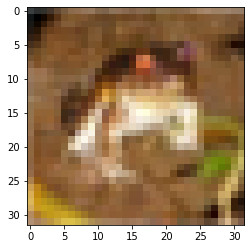

In [6]:
plt.imshow(x_train[0])

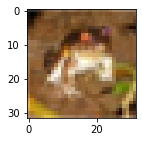

In [7]:
plt.figure(figsize= (15,2))
plt.imshow(x_train[0])


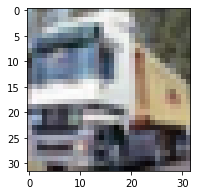

In [8]:
plt.figure(figsize= (15,3))
plt.imshow(x_train[1])

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
classes = ["airplane", "automobile", "bird", "cat", "deer","dog","frog","horse","ship","truck"]
# these the 10 different classes of our dataset.

In [13]:
classes[9]

'truck'

In [14]:
def plot_sample(x,y,index):
    plt.figure(figsize= (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

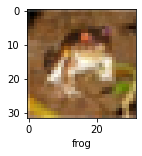

In [15]:
plot_sample(x_train, y_train, 0)

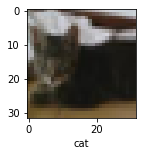

In [16]:
plot_sample(x_train, y_train, 9)

## we have to normalize our data...(scaling)
## so we will divide with max range of pixel (255).

In [17]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [18]:
x_train = x_train / 255
x_test = x_test / 255

In [19]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## Using ANN:

In [20]:
# ANN
from tensorflow import keras
model =  keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,  activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer="SGD",
              loss = "sparse_categorical_crossentropy", 
              metrics = ["accuracy"]
              )
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.8616 - accuracy: 0.3338
Epoch 2/5
1563/1563 [==============================] - 99s 64ms/step - loss: 1.6589 - accuracy: 0.4123
Epoch 3/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.5698 - accuracy: 0.4465
Epoch 4/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.5101 - accuracy: 0.4663
Epoch 5/5
1563/1563 [==============================] - 82s 53ms/step - loss: 1.4601 - accuracy: 0.4834


In [44]:
#model.evaluate(x_test, y_test)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = model.predict(x_test)

y_pred_classes = [np.argmax(element) for element in y_pred]

In [48]:
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52      1000
           1       0.62      0.52      0.57      1000
           2       0.35      0.45      0.39      1000
           3       0.44      0.17      0.25      1000
           4       0.50      0.28      0.36      1000
           5       0.41      0.33      0.37      1000
           6       0.56      0.48      0.52      1000
           7       0.46      0.63      0.53      1000
           8       0.45      0.75      0.56      1000
           9       0.50      0.57      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.46     10000
weighted avg       0.48      0.47      0.46     10000



## we're going to use CNN to improve the performance of this model...

## CNN:

In [49]:
from tensorflow import keras
cnn =  models.Sequential([
    #CNN
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    
    #Dense
    keras.layers.Flatten(),
    keras.layers.Dense(64,  activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [25]:
cnn.compile(optimizer="adam",
           loss="sparse_categorical_crossentropy",
           metrics=["accuracy"])

In [26]:
cnn.fit(x_train, y_train, epochs=5)
# we can give some more number of epochs for better accuracy...

Epoch 1/5
1563/1563 [==============================] - 32s 20ms/step - loss: 1.4162 - accuracy: 0.4937
Epoch 2/5
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0792 - accuracy: 0.6233
Epoch 3/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9551 - accuracy: 0.6674
Epoch 4/5
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8725 - accuracy: 0.6953
Epoch 5/5
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8028 - accuracy: 0.7222


### so we have got an 72% accuracy using CNN for 5 epochs
### but in ANN we have got only 48% accuracy for 5 epochs

In [43]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.9096 - accuracy: 0.6922


[0.9095830321311951, 0.6922000050544739]

In [28]:
#plot_sample(x_test, y_test)

In [29]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [30]:
# we have to reshape the y_test to a one dimensional array

y_test = y_test.reshape(-1,)

In [31]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

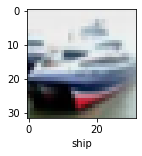

In [32]:
plot_sample(x_test, y_test, 1)

In [33]:
y_predi = cnn.predict(x_test)
y_predi[:5]

array([[2.1296795e-03, 9.6582708e-06, 4.8457021e-03, 8.8818699e-01,
        8.8591338e-04, 7.7938117e-02, 2.3327086e-02, 1.6744301e-05,
        2.5610537e-03, 9.9132048e-05],
       [1.8358560e-02, 4.9019791e-02, 2.6724389e-05, 2.4306695e-05,
        3.6431936e-06, 1.5995190e-07, 4.7660929e-08, 4.3907832e-07,
        9.2722261e-01, 5.3437925e-03],
       [2.8826618e-01, 1.3159165e-01, 1.2422242e-02, 5.2933019e-02,
        5.9647844e-03, 8.0249486e-03, 7.6713652e-04, 1.2603236e-02,
        3.9872470e-01, 8.8702165e-02],
       [9.1611671e-01, 5.0596908e-02, 1.1267138e-02, 3.8511804e-04,
        1.4862037e-02, 2.1726064e-05, 1.4264922e-04, 1.4345234e-04,
        6.2065162e-03, 2.5775147e-04],
       [1.2005285e-05, 3.0813088e-05, 1.6462006e-02, 3.7571572e-02,
        6.7325222e-01, 9.4172759e-03, 2.6319352e-01, 2.4445511e-05,
        3.3763161e-05, 2.2111496e-06]], dtype=float32)

In [34]:
np.argmax([3,45,656,5,4])
# so argmax will give the maximum number in an array...

2

In [35]:
y_predi_classes = [np.argmax(element) for element in y_predi]

In [36]:
y_predi_classes[:20]

[3, 8, 8, 0, 4, 6, 3, 4, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6]

In [37]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

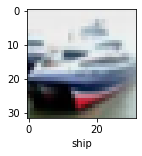

In [38]:
plot_sample(x_test, y_test, 1)

In [39]:
classes[y_predi_classes[1]]

'ship'

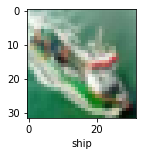

In [40]:
plot_sample(x_test, y_test, 15)

In [41]:
classes[y_predi_classes[15]]
# here our model made a mistake....

'ship'

In [42]:
print(classification_report(y_test, y_predi_classes))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73      1000
           1       0.83      0.78      0.80      1000
           2       0.59      0.60      0.59      1000
           3       0.57      0.41      0.48      1000
           4       0.64      0.65      0.64      1000
           5       0.52      0.70      0.60      1000
           6       0.82      0.70      0.76      1000
           7       0.73      0.74      0.74      1000
           8       0.86      0.75      0.80      1000
           9       0.79      0.77      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



## Finally, we can see a good accuracy in CNN 
## we can conclude that, it is better to use CNN for an image classifications.